
🏟️Find a stadium (enter [key] to see instructions)🏟️ key



⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾

Enter the MLB stadium name or the wiki url to display the stadium vector graphic

[stop] --- exit program

[random/leave it blank] --- get a random stadium

[all] --- get current stadium list

[key] --- get instructions

--ENJOY SEARCHING--
 
⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾




🏟️Find a stadium (enter [key] to see instructions)🏟️ random


This is the Citi Field Stadium
https://en.wikipedia.org//wiki/Citi_Field


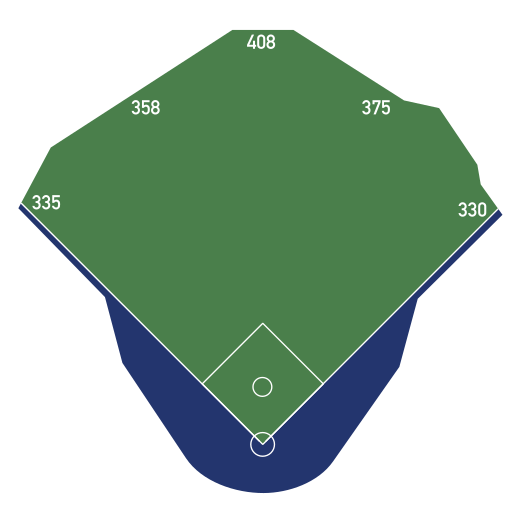


🏟️Find a stadium (enter [key] to see instructions)🏟️ 


This is the Tropicana Field Stadium
https://en.wikipedia.org//wiki/Tropicana_Field


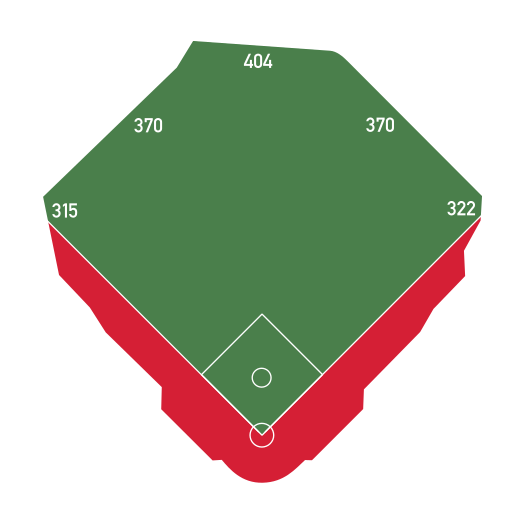


🏟️Find a stadium (enter [key] to see instructions)🏟️ all


American Family Field
Angel Stadium
Busch Stadium
Chase Field
Citi Field
Citizens Bank Park
Comerica Park
Coors Field
Dodger Stadium
Fenway Park
Globe Life Field
Great American Ball Park
Guaranteed Rate Field
Kauffman Stadium
LoanDepot Park
Minute Maid Park
Nationals Park
Oakland Coliseum
Oracle Park
Oriole Park at Camden Yards
Petco Park
PNC Park
Progressive Field
Rogers Centre
T-Mobile Park
Target Field
Tropicana Field
Truist Park
Wrigley Field
Yankee Stadium



🏟️Find a stadium (enter [key] to see instructions)🏟️ key



⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾

Enter the MLB stadium name or the wiki url to display the stadium vector graphic

[stop] --- exit program

[random/leave it blank] --- get a random stadium

[all] --- get current stadium list

[key] --- get instructions

--ENJOY SEARCHING--
 
⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾




🏟️Find a stadium (enter [key] to see instructions)🏟️ stop


In [106]:
while True:
    stadium = input('\n🏟️Find a stadium (enter [key] to see instructions)🏟️')
    if stadium == 'stop':
        break
    elif stadium == 'all':
        key = list(mlb_stadiums.keys())
        print(*key, sep = "\n")
    elif stadium == 'key':
        print('\n⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾\n')
        print('Enter the MLB stadium name or the wiki url to display the stadium vector graphic\n')
        print('[stop] --- exit program\n')
        print('[random/leave it blank] --- get a random stadium\n')
        print('[all] --- get current stadium list\n')
        print('[key] --- get instructions\n')
        print('--ENJOY SEARCHING--\n ')
        print('⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾\n')
    else:
        import wikipedia
        import requests
        import json
        from bs4 import BeautifulSoup
        
        WIKI_REQUEST = 'https://en.wikipedia.org/wiki/List_of_current_Major_League_Baseball_stadiums'
        response = requests.get(WIKI_REQUEST)
        soup = BeautifulSoup(response.text)
        table = soup.find('table',{'class':"wikitable sortable plainrowheaders"})
        tr = table.find_all('tr')
        mlb_stadiums = {}
        for i in tr:
            td = i.find_all('td')
            th = i.find_all('th')
            wiki = 'https://en.wikipedia.org/'
            if td != []:
                style_yes = i.get('style')
                if style_yes is not None:
                    title = td[1].find('a').get('title')
                    url = wiki + td[1].find('a').get('href')
                else:
                    title = th[0].find('a').get('title')
                    url = wiki + th[0].find('a').get('href')
                mlb_stadiums[title] = url
        
        
        def get_pic(page_url):
            response = requests.get(page_url)
            soup = BeautifulSoup(response.text)
            table_re = soup.find('table',{'class':'infobox vcard'}).find_all(lambda tag: tag.name == 'td' and tag.get('class') == ['infobox-data'])
            for item in table_re:
                re = item.find('a',{'class': 'image'})
                if re is not None:
                    url = 'https://en.wikipedia.org/' + re.get('href')
            response = requests.get(url)
            soup = BeautifulSoup(response.text)
            full_pic_link = 'https:' + soup.find('div',{'class': "fullImageLink"}).find('a').get('href')
            return(full_pic_link)

        
        def stadium_finder(word = None):
            if (word is None) | (word == 'random')|(word == ''):
                import random
                stad, url =  random.choice(list(mlb_stadiums.items()))
            elif word in mlb_stadiums.keys():
                stad = word
                url = mlb_stadiums[word]
            elif word in mlb_stadiums.values():
                url = word
                stad = list(mlb_stadiums.keys())[list(mlb_stadiums.values()).index(word)]
            else:
                print(f"Hey! No matched result! Wanna try again?\nhint: you can type 'all' to see all the stadiums")
                return None, None
            return stad, url

                
        def show_svg(url):
            from IPython.display import SVG, display
            display(SVG(url = url))

            
        stad, url = stadium_finder(stadium)
        if stad is not None:
            link = get_pic(url)
            print(f'This is the {stad} Stadium')
            print(url)
            show_svg(link)